In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import datetime as dt

Cleansing of population and GDP csv files
--------------------------------------------------

In [2]:
# Read in population csv
popn_df =pd.read_csv('resources/population.csv', skiprows=4)

# View columns of csv
popn_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [3]:
# Select only columns that are within scope of our study
popn_select_df = popn_df[['Country Name', 'Country Code','2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]

# Rename "Country Name" column so that it matches with elec_df
popn_final_df = popn_select_df.rename(columns={'Country Name':'Country'})

# View df head
popn_final_df.head()

,Country,Country Code,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,99212.0,100341.0,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0
1,Africa Eastern and Southern,AFE,509410477.0,523459657.0,537792950.0,552530654.0,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0
2,Afghanistan,AFG,27385307.0,28189672.0,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0
3,Africa Western and Central,AFW,346475221.0,356337762.0,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0
4,Angola,AGO,22507674.0,23364185.0,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0


In [4]:
# Read in gdp csv
gdp_df =pd.read_csv('resources/gdp.csv', skiprows=4)

# Select only columns that are within scope of our study
gdp_select_df = gdp_df[['Country Name', 'Country Code','2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]

# Rename "Country Name" column so that it matches with elec_df
gdp_final_df = gdp_select_df.rename(columns={'Country Name':'Country'})

# View df head
gdp_final_df.head()

,Country,Country Code,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,2.553631e+09,2.453631e+09,2.637989e+09,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09
1,Africa Eastern and Southern,AFE,7.190950e+11,8.603610e+11,9.642130e+11,9.720020e+11,9.826770e+11,1.003400e+12,9.231440e+11,8.898590e+11,1.030480e+12,1.016700e+12,1.009050e+12,9.341790e+11,1.089450e+12
2,Afghanistan,AFG,1.215484e+10,1.563386e+10,1.819041e+10,2.020357e+10,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10,2.014344e+10,1.478686e+10
3,Africa Western and Central,AFW,5.070300e+11,5.971290e+11,6.804560e+11,7.360400e+11,8.322170e+11,8.924980e+11,7.669580e+11,6.905450e+11,6.837480e+11,7.663600e+11,7.947190e+11,7.848000e+11,8.401870e+11
4,Angola,AGO,7.030717e+10,8.169953e+10,1.094370e+11,1.249980e+11,1.334020e+11,1.372440e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.361907e+10,6.740429e+10


In [5]:
# Read in electricity csv
elec_df =pd.read_csv('resources/MES_0123.csv', skiprows=8)

# View df head
elec_df.head()

,Country,Time,Balance,Product,Value,Unit
0,Australia,Jan-23,Net Electricity Production,Electricity,22963.2021,GWh
1,Australia,Jan-23,Net Electricity Production,Total Combustible Fuels,14190.6365,GWh
2,Australia,Jan-23,Net Electricity Production,"Coal, Peat and Manufactured Gases",10231.1342,GWh
3,Australia,Jan-23,Net Electricity Production,Oil and Petroleum Products,316.7434,GWh
4,Australia,Jan-23,Net Electricity Production,Natural Gas,3382.4090,GWh


In [6]:
# Create list of countries that are included in electricity dataset and show length of list
country_list = elec_df['Country'].unique()
print(f'Length of country_list: {len(country_list)}')
print(country_list)
# Note that 'country_list' includes 5 non-country entries

Length of country_list: 53
['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Colombia' 'Costa Rica'
 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'France' 'Germany'
 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan' 'Korea' 'Latvia'
 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand' 'Norway'
 'Poland' 'Portugal' 'Slovak Republic' 'Slovenia' 'Spain' 'Sweden'
 'Switzerland' 'Republic of Turkiye' 'United Kingdom' 'United States'
 'OECD Americas' 'OECD Asia Oceania' 'OECD Europe' 'OECD Total'
 'IEA Total' 'Argentina' 'Brazil' 'Bulgaria' "People's Republic of China"
 'Croatia' 'Cyprus' 'India' 'Malta' 'North Macedonia' 'Romania' 'Serbia']


In [7]:
# Create dataframe of countries in electricity dataset
country_df = pd.DataFrame(country_list,columns=['Country'])

# Check length
country_df.count()

Country    53
dtype: int64

In [8]:
# Drop non-country elements of country_df
country_df_clean = country_df.drop([37,38,39,40,41])

# Print length of clean country df
print(f'Length of country_df: {len(country_df_clean)}')

# Create and print elements of clean country df to ensure correct elements were dropped
country_list_clean = country_df_clean['Country'].unique()
print(country_list_clean)

Length of country_df: 48
['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Colombia' 'Costa Rica'
 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'France' 'Germany'
 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan' 'Korea' 'Latvia'
 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand' 'Norway'
 'Poland' 'Portugal' 'Slovak Republic' 'Slovenia' 'Spain' 'Sweden'
 'Switzerland' 'Republic of Turkiye' 'United Kingdom' 'United States'
 'Argentina' 'Brazil' 'Bulgaria' "People's Republic of China" 'Croatia'
 'Cyprus' 'India' 'Malta' 'North Macedonia' 'Romania' 'Serbia']


In [9]:
# Create country name and country code df, so that we can add country codes to our electricity df
country_code_df = popn_final_df[['Country', 'Country Code']]

# Show length and head of country code df
print(f'Length of country_code_df: {len(country_code_df)}')
country_code_df.head()

# Note 266 rows

Length of country_code_df: 266


,Country,Country Code
0,Aruba,ABW
1,Africa Eastern and Southern,AFE
2,Afghanistan,AFG
3,Africa Western and Central,AFW
4,Angola,AGO


In [10]:
# Merge country code df and country list clean to get a list of countries in the electricity dataset, with corresponding country codes
select_country_code_df = pd.merge(country_df_clean,country_code_df,how='left',on='Country')

# Show length and head of select country code df
print(f'Length of select_country_code_df : {len(select_country_code_df)}')
select_country_code_df.head()


Length of select_country_code_df : 48


,Country,Country Code
0,Australia,AUS
1,Austria,AUT
2,Belgium,BEL
3,Canada,CAN
4,Chile,CHL


In [11]:
# Identify rows with nulls
select_country_code_df[select_country_code_df['Country Code'].isnull()]

,Country,Country Code
34,Republic of Turkiye,NaN
40,People's Republic of China,NaN


In [12]:
# Fill in country codes for those few countries will null values
select_country_code_df.iloc[7,1] = 'CZE'
select_country_code_df.iloc[19,1] = 'KOR'
select_country_code_df.iloc[34,1] = 'TUR'
select_country_code_df.iloc[40,1] = 'CHN'

In [13]:
# Check again for nulls
select_country_code_df.isnull().values.any()

False

In [14]:
# Drop "Country" column from population final df in preparation for merge
popn_drop_df = popn_final_df.drop(columns= 'Country')

# Create population df with only countries in electricity df using merge
popn_select_country_df = pd.merge(select_country_code_df, popn_drop_df, how='left', on='Country Code')

# Check length of df (targeting 48) and show head
print(f'Length of popn_select_country_df : {len(popn_select_country_df)}')
popn_select_country_df.head()

Length of popn_select_country_df : 48


,Country,Country Code,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Australia,AUS,21691653.0,22031750.0,22340024.0,22733465.0,23128129.0,23475686.0,23815995.0,24190907.0,24594202.0,24966643.0,25340217.0,25655289.0,25688079.0
1,Austria,AUT,8343323.0,8363404.0,8391643.0,8429991.0,8479823.0,8546356.0,8642699.0,8736668.0,8797566.0,8840521.0,8879920.0,8916864.0,8955797.0
2,Belgium,BEL,10796493.0,10895586.0,11038264.0,11106932.0,11159407.0,11209057.0,11274196.0,11331422.0,11375158.0,11427054.0,11488980.0,11538604.0,11592952.0
3,Canada,CAN,33628895.0,34004889.0,34339328.0,34714222.0,35082954.0,35437435.0,35702908.0,36109487.0,36545236.0,37065084.0,37601230.0,38037204.0,38246108.0
4,Chile,CHL,16833447.0,17004162.0,17173573.0,17341771.0,17509925.0,17687108.0,17870124.0,18083879.0,18368577.0,18701450.0,19039485.0,19300315.0,19493184.0


In [15]:
popn_select_country_df = popn_select_country_df.melt(id_vars=['Country', 'Country Code'], 
        var_name="Year", 
        value_name="Population")


In [16]:
popn_select_country_df.head()

,Country,Country Code,Year,Population
0,Australia,AUS,2009,21691653.0
1,Austria,AUT,2009,8343323.0
2,Belgium,BEL,2009,10796493.0
3,Canada,CAN,2009,33628895.0
4,Chile,CHL,2009,16833447.0


In [17]:
popn_select_country_df['AnnualPopn_DIFF'] = popn_select_country_df.groupby('Country')['Population'].apply(lambda x: x - x.shift()).fillna(0)

In [18]:
popn_select_country_df

,Country,Country Code,Year,Population,AnnualPopn_DIFF
0,Australia,AUS,2009,2.169165e+07,0.0
1,Austria,AUT,2009,8.343323e+06,0.0
2,Belgium,BEL,2009,1.079649e+07,0.0
3,Canada,CAN,2009,3.362890e+07,0.0
4,Chile,CHL,2009,1.683345e+07,0.0
...,...,...,...,...,...
619,India,IND,2021,1.407564e+09,11176715.0
620,Malta,MLT,2021,5.185360e+05,3204.0
621,North Macedonia,MKD,2021,2.065092e+06,-7439.0
622,Romania,ROU,2021,1.911988e+07,-145370.0


In [19]:
popn_select_country_df = popn_select_country_df.sort_values(by=['Country','Year'])

In [20]:
popn_select_country_df = popn_select_country_df[popn_select_country_df['Year']!='2009']
popn_select_country_df['Month'] = '01'
popn_select_country_df['PopulationPerMonth'] = (popn_select_country_df['Population']-
                                         (popn_select_country_df['AnnualPopn_DIFF']*11/12))

In [21]:
popn_select_country_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 85 to 612
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             576 non-null    object 
 1   Country Code        576 non-null    object 
 2   Year                576 non-null    object 
 3   Population          576 non-null    float64
 4   AnnualPopn_DIFF     576 non-null    float64
 5   Month               576 non-null    object 
 6   PopulationPerMonth  576 non-null    float64
dtypes: float64(3), object(4)
memory usage: 36.0+ KB


In [22]:
popn_select_country_df_v1 = popn_select_country_df.copy()

In [23]:
for row in popn_select_country_df.iterrows():
    new_row1 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'],
                              'Year':row[1]['Year'], 'Population':row[1]['Population'], 
                              'AnnualPopn_DIFF':row[1]['AnnualPopn_DIFF'], 
                'Month':'02',
                'PopulationPerMonth':row[1]['Population']-(row[1]['AnnualPopn_DIFF']*10/12)},
                index=[row[1]['Country']+'Feb'+row[1]['Year']])
    print(new_row1['PopulationPerMonth'])
    new_row2 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'],
                              'Year':row[1]['Year'], 'Population':row[1]['Population'], 'AnnualPopn_DIFF':row[1]['AnnualPopn_DIFF'], 
                'Month':'03',
                'PopulationPerMonth':row[1]['Population']-(row[1]['AnnualPopn_DIFF']*9/12)},
                index=[row[1]['Country']+'Mar'+row[1]['Year']])
    new_row3 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'],
                              'Year':row[1]['Year'], 'Population':row[1]['Population'], 'AnnualPopn_DIFF':row[1]['AnnualPopn_DIFF'], 
                'Month':'04',
                'PopulationPerMonth':row[1]['Population']-(row[1]['AnnualPopn_DIFF']*8/12)},
                index=[row[1]['Country']+'Apr'+row[1]['Year']])
    new_row4 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'],
                              'Year':row[1]['Year'], 'Population':row[1]['Population'], 'AnnualPopn_DIFF':row[1]['AnnualPopn_DIFF'], 
                'Month':'05',
                'PopulationPerMonth':row[1]['Population']-(row[1]['AnnualPopn_DIFF']*7/12)},
                index=[row[1]['Country']+'May'+row[1]['Year']])
    new_row5 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'],
                              'Year':row[1]['Year'], 'Population':row[1]['Population'], 
                              'AnnualPopn_DIFF':row[1]['AnnualPopn_DIFF'], 
                'Month':'06',
                'PopulationPerMonth':row[1]['Population']-(row[1]['AnnualPopn_DIFF']*6/12)}
                ,index=[row[1]['Country']+'Jun'+row[1]['Year']])
    new_row6 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'],
                              'Year':row[1]['Year'], 'Population':row[1]['Population'], 
                              'AnnualPopn_DIFF':row[1]['AnnualPopn_DIFF'], 
                              'Month':'07',
                'PopulationPerMonth':row[1]['Population']-(row[1]['AnnualPopn_DIFF']*5/12)},
                index=[row[1]['Country']+'Jul'+row[1]['Year']])
    new_row7 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'],
                              'Year':row[1]['Year'], 'Population':row[1]['Population'], 
                              'AnnualPopn_DIFF':row[1]['AnnualPopn_DIFF'], 
                              'Month':'08',
                'PopulationPerMonth':row[1]['Population']-(row[1]['AnnualPopn_DIFF']*4/12)},
                index=[row[1]['Country']+'Aug'+row[1]['Year']])
    new_row8 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'],
                              'Year':row[1]['Year'], 'Population':row[1]['Population'], 
                              'AnnualPopn_DIFF':row[1]['AnnualPopn_DIFF'],               
                              'Month':'09',
                'PopulationPerMonth':row[1]['Population']-(row[1]['AnnualPopn_DIFF']*3/12)},
                index=[row[1]['Country']+'Sep'+row[1]['Year']])
    new_row9 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'],
                              'Year':row[1]['Year'], 'Population':row[1]['Population'], 
                              'AnnualPopn_DIFF':row[1]['AnnualPopn_DIFF'],               
                              'Month':'10',
                'PopulationPerMonth':row[1]['Population']-(row[1]['AnnualPopn_DIFF']*2/12)},
                index=[row[1]['Country']+'Oct'+row[1]['Year']])
    new_row10 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'],
                              'Year':row[1]['Year'], 'Population':row[1]['Population'], 
                              'AnnualPopn_DIFF':row[1]['AnnualPopn_DIFF'],               
                              'Month':'11',
                'PopulationPerMonth':row[1]['Population']-(row[1]['AnnualPopn_DIFF']*1/12)},
                index=[row[1]['Country']+'Nov'+row[1]['Year']])
    new_row11 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'],
                              'Year':row[1]['Year'], 'Population':row[1]['Population'], 
                              'AnnualPopn_DIFF':row[1]['AnnualPopn_DIFF'],               
                              'Month':'12',
                'PopulationPerMonth':row[1]['Population']},
                index=[row[1]['Country']+'Dec'+row[1]['Year']])
    popn_select_country_df_v1 = popn_select_country_df_v1.append(new_row1,ignore_index=True)
    popn_select_country_df_v1 = popn_select_country_df_v1.append(new_row2,ignore_index=True)
    popn_select_country_df_v1 = popn_select_country_df_v1.append(new_row3,ignore_index=True)
    popn_select_country_df_v1 = popn_select_country_df_v1.append(new_row4,ignore_index=True)
    popn_select_country_df_v1 = popn_select_country_df_v1.append(new_row5,ignore_index=True)
    popn_select_country_df_v1 = popn_select_country_df_v1.append(new_row6,ignore_index=True)
    popn_select_country_df_v1 = popn_select_country_df_v1.append(new_row7,ignore_index=True)
    popn_select_country_df_v1 = popn_select_country_df_v1.append(new_row8,ignore_index=True)
    popn_select_country_df_v1 = popn_select_country_df_v1.append(new_row9,ignore_index=True)
    popn_select_country_df_v1 = popn_select_country_df_v1.append(new_row10,ignore_index=True)
    popn_select_country_df_v1 = popn_select_country_df_v1.append(new_row11,ignore_index=True)

ArgentinaFeb2010    40701690.5
Name: PopulationPerMonth, dtype: float64
ArgentinaFeb2011    40867292.5
Name: PopulationPerMonth, dtype: float64
ArgentinaFeb2012    4.134012e+07
Name: PopulationPerMonth, dtype: float64
ArgentinaFeb2013    4.181155e+07
Name: PopulationPerMonth, dtype: float64
ArgentinaFeb2014    4.228070e+07
Name: PopulationPerMonth, dtype: float64
ArgentinaFeb2015    4.274658e+07
Name: PopulationPerMonth, dtype: float64
ArgentinaFeb2016    4.320837e+07
Name: PopulationPerMonth, dtype: float64
ArgentinaFeb2017    43666108.5
Name: PopulationPerMonth, dtype: float64
ArgentinaFeb2018    44119759.5
Name: PopulationPerMonth, dtype: float64
ArgentinaFeb2019    44568537.0
Name: PopulationPerMonth, dtype: float64
ArgentinaFeb2020    45011720.5
Name: PopulationPerMonth, dtype: float64
ArgentinaFeb2021    4.544876e+07
Name: PopulationPerMonth, dtype: float64
AustraliaFeb2010    2.174834e+07
Name: PopulationPerMonth, dtype: float64
AustraliaFeb2011    22083129.0
Name: PopulationPer

In [24]:
popn_select_country_df_v1.tail()

,Country,Country Code,Year,Population,AnnualPopn_DIFF,Month,PopulationPerMonth
6907,United States,USA,2021,331893745.0,392665.0,08,3.317629e+08
6908,United States,USA,2021,331893745.0,392665.0,09,3.317956e+08
6909,United States,USA,2021,331893745.0,392665.0,10,3.318283e+08
6910,United States,USA,2021,331893745.0,392665.0,11,3.318610e+08
6911,United States,USA,2021,331893745.0,392665.0,12,3.318937e+08


In [25]:
# Drop "Country" column from gdp final df in preparation for merge
gdp_drop_df = gdp_final_df.drop(columns= 'Country')

# Create gdp df with only countries in electricity df using merge
gdp_select_country_df = pd.merge(select_country_code_df, gdp_drop_df, how='left', on='Country Code')

# Check length of df (targeting 48) and show head
print(f'Length of gdp_select_country_df : {len(gdp_select_country_df)}')
gdp_select_country_df.head()

Length of gdp_select_country_df : 48


,Country,Country Code,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Australia,AUS,9.286270e+11,1.148610e+12,1.398410e+12,1.546890e+12,1.576380e+12,1.467550e+12,1.350620e+12,1.206540e+12,1.326520e+12,1.428290e+12,1.392230e+12,1.326900e+12,1.552670e+12
1,Austria,AUT,4.017590e+11,3.922750e+11,4.316850e+11,4.094020e+11,4.301910e+11,4.425850e+11,3.819710e+11,3.958370e+11,4.172610e+11,4.549910e+11,4.446210e+11,4.352250e+11,4.803680e+11
2,Belgium,BEL,4.832540e+11,4.814210e+11,5.233300e+11,4.961530e+11,5.217910e+11,5.353900e+11,4.623360e+11,4.760630e+11,5.027650e+11,5.432990e+11,5.358310e+11,5.252120e+11,5.941040e+11
3,Canada,CAN,1.374630e+12,1.617340e+12,1.793330e+12,1.828370e+12,1.846600e+12,1.805750e+12,1.556510e+12,1.527990e+12,1.649270e+12,1.725330e+12,1.742020e+12,1.645420e+12,1.988340e+12
4,Chile,CHL,1.714130e+11,2.171050e+11,2.512250e+11,2.671760e+11,2.772390e+11,2.594050e+11,2.424970e+11,2.492990e+11,2.763650e+11,2.954030e+11,2.785850e+11,2.527270e+11,3.170590e+11


In [26]:
gdp_select_country_df = gdp_select_country_df.melt(id_vars=['Country', 'Country Code'], 
        var_name="Year", 
        value_name="GDP")

In [27]:
gdp_select_country_df.head()

,Country,Country Code,Year,GDP
0,Australia,AUS,2009,9.286270e+11
1,Austria,AUT,2009,4.017590e+11
2,Belgium,BEL,2009,4.832540e+11
3,Canada,CAN,2009,1.374630e+12
4,Chile,CHL,2009,1.714130e+11


In [28]:
gdp_select_country_df['AnnualGDP_DIFF'] = gdp_select_country_df.groupby('Country')['GDP'].apply(lambda x: x - x.shift()).fillna(0)

In [29]:
gdp_select_country_df = gdp_select_country_df.sort_values(by=['Country','Year'])

In [30]:
gdp_select_country_df.head()

,Country,Country Code,Year,GDP,AnnualGDP_DIFF
37,Argentina,ARG,2009,3.329760e+11,0.000000e+00
85,Argentina,ARG,2010,4.236270e+11,9.065100e+10
133,Argentina,ARG,2011,5.301630e+11,1.065360e+11
181,Argentina,ARG,2012,5.459820e+11,1.581900e+10
229,Argentina,ARG,2013,5.520250e+11,6.043000e+09


In [31]:
gdp_select_country_df = gdp_select_country_df[gdp_select_country_df['Year']!='2009']
gdp_select_country_df['Month'] = '01'
gdp_select_country_df['GDPPerMonth'] = (gdp_select_country_df['GDP']*1/12)

In [32]:
gdp_select_country_df.head(10)

,Country,Country Code,Year,GDP,AnnualGDP_DIFF,Month,GDPPerMonth
85,Argentina,ARG,2010,4.236270e+11,9.065100e+10,01,3.530225e+10
133,Argentina,ARG,2011,5.301630e+11,1.065360e+11,01,4.418025e+10
181,Argentina,ARG,2012,5.459820e+11,1.581900e+10,01,4.549850e+10
229,Argentina,ARG,2013,5.520250e+11,6.043000e+09,01,4.600208e+10
277,Argentina,ARG,2014,5.263200e+11,-2.570500e+10,01,4.386000e+10
325,Argentina,ARG,2015,5.947490e+11,6.842900e+10,01,4.956242e+10
373,Argentina,ARG,2016,5.575310e+11,-3.721800e+10,01,4.646092e+10
421,Argentina,ARG,2017,6.436290e+11,8.609800e+10,01,5.363575e+10
469,Argentina,ARG,2018,5.248200e+11,-1.188090e+11,01,4.373500e+10
517,Argentina,ARG,2019,4.477550e+11,-7.706500e+10,01,3.731292e+10


In [33]:
gdp_select_country_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 85 to 612
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         576 non-null    object 
 1   Country Code    576 non-null    object 
 2   Year            576 non-null    object 
 3   GDP             576 non-null    float64
 4   AnnualGDP_DIFF  576 non-null    float64
 5   Month           576 non-null    object 
 6   GDPPerMonth     576 non-null    float64
dtypes: float64(3), object(4)
memory usage: 36.0+ KB


In [34]:
gdp_select_country_df_v1 = gdp_select_country_df.copy()

In [35]:
for row in gdp_select_country_df.iterrows():
    new_row1 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'], 'Year':row[1]['Year'], 'GDP':row[1]['GDP'], 'AnnualGDP_DIFF':row[1]['AnnualGDP_DIFF'], 
                'Month':'02',
                'GDPPerMonth':(row[1]['GDP']/12)},
                index=[row[1]['Country']+'Feb'+row[1]['Year']])
    new_row2 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'], 'Year':row[1]['Year'], 'GDP':row[1]['GDP'], 'AnnualGDP_DIFF':row[1]['AnnualGDP_DIFF'], 
                'Month':'03',
                'GDPPerMonth':((row[1]['GDP']/12))},
                index=[row[1]['Country']+'Mar'+row[1]['Year']])
    new_row3 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'], 'Year':row[1]['Year'], 'GDP':row[1]['GDP'], 'AnnualGDP_DIFF':row[1]['AnnualGDP_DIFF'], 
                'Month':'04',
                'GDPPerMonth':((row[1]['GDP']/12))},
                index=[row[1]['Country']+'Apr'+row[1]['Year']])
    new_row4 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'], 'Year':row[1]['Year'], 'GDP':row[1]['GDP'], 'AnnualGDP_DIFF':row[1]['AnnualGDP_DIFF'], 
                'Month':'05',
                'GDPPerMonth':(row[1]['GDP']/12)},
                index=[row[1]['Country']+'May'+row[1]['Year']])
    new_row5 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'], 'Year':row[1]['Year'], 'GDP':row[1]['GDP'], 'AnnualGDP_DIFF':row[1]['AnnualGDP_DIFF'], 
                'Month':'06',
                'GDPPerMonth':(row[1]['GDP']/12)}
                ,index=[row[1]['Country']+'Jun'+row[1]['Year']])
    new_row6 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'], 'Year':row[1]['Year'], 'GDP':row[1]['GDP'], 'AnnualGDP_DIFF':row[1]['AnnualGDP_DIFF'], 
                'Month':'07',
                'GDPPerMonth':(row[1]['GDP']/12)}
                ,index=[row[1]['Country']+'Jul'+row[1]['Year']])
    new_row7 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'], 'Year':row[1]['Year'], 'GDP':row[1]['GDP'], 'AnnualGDP_DIFF':row[1]['AnnualGDP_DIFF'], 
                'Month':'08',
                'GDPPerMonth':(row[1]['GDP']/12)}
                ,index=[row[1]['Country']+'Aug'+row[1]['Year']])
    new_row8 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'], 'Year':row[1]['Year'], 'GDP':row[1]['GDP'], 'AnnualGDP_DIFF':row[1]['AnnualGDP_DIFF'], 
                'Month':'09',
                'GDPPerMonth':(row[1]['GDP']/12)}
                ,index=[row[1]['Country']+'Sep'+row[1]['Year']])
    new_row9 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'], 'Year':row[1]['Year'], 'GDP':row[1]['GDP'], 'AnnualGDP_DIFF':row[1]['AnnualGDP_DIFF'], 
                'Month':'10',
                'GDPPerMonth':(row[1]['GDP']/12)}
                ,index=[row[1]['Country']+'Oct'+row[1]['Year']])
    new_row10 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'], 'Year':row[1]['Year'], 'GDP':row[1]['GDP'], 'AnnualGDP_DIFF':row[1]['AnnualGDP_DIFF'], 
                'Month':'11',
                'GDPPerMonth':(row[1]['GDP']/12)}
                ,index=[row[1]['Country']+'Nov'+row[1]['Year']])
    new_row11 = pd.DataFrame({'Country':row[1]['Country'], 'Country Code':row[1]['Country Code'], 'Year':row[1]['Year'], 'GDP':row[1]['GDP'], 'AnnualGDP_DIFF':row[1]['AnnualGDP_DIFF'], 
                'Month':'12',
                'GDPPerMonth':(row[1]['GDP']/12)}
                ,index=[row[1]['Country']+'Nov'+row[1]['Year']])
    gdp_select_country_df_v1 = gdp_select_country_df_v1.append(new_row1,ignore_index=True)
    gdp_select_country_df_v1 = gdp_select_country_df_v1.append(new_row2,ignore_index=True)
    gdp_select_country_df_v1 = gdp_select_country_df_v1.append(new_row3,ignore_index=True)
    gdp_select_country_df_v1 = gdp_select_country_df_v1.append(new_row4,ignore_index=True)
    gdp_select_country_df_v1 = gdp_select_country_df_v1.append(new_row5,ignore_index=True)
    gdp_select_country_df_v1 = gdp_select_country_df_v1.append(new_row6,ignore_index=True)
    gdp_select_country_df_v1 = gdp_select_country_df_v1.append(new_row7,ignore_index=True)
    gdp_select_country_df_v1 = gdp_select_country_df_v1.append(new_row8,ignore_index=True)
    gdp_select_country_df_v1 = gdp_select_country_df_v1.append(new_row9,ignore_index=True)
    gdp_select_country_df_v1 = gdp_select_country_df_v1.append(new_row10,ignore_index=True)
    gdp_select_country_df_v1 = gdp_select_country_df_v1.append(new_row11,ignore_index=True)

In [36]:
gdp_select_country_df_v1 = gdp_select_country_df_v1.sort_values(by=['Country','Year'])

In [37]:
gdp_select_country_df_final = gdp_select_country_df_v1.drop(columns=['AnnualGDP_DIFF','GDP'])

In [38]:
gdp_select_country_df_final.head()

,Country,Country Code,Year,Month,GDPPerMonth
0,Argentina,ARG,2010,01,3.530225e+10
576,Argentina,ARG,2010,02,3.530225e+10
577,Argentina,ARG,2010,03,3.530225e+10
578,Argentina,ARG,2010,04,3.530225e+10
579,Argentina,ARG,2010,05,3.530225e+10


In [39]:
popn_select_country_df_v1.columns

Index(['Country', 'Country Code', 'Year', 'Population', 'AnnualPopn_DIFF',
       'Month', 'PopulationPerMonth'],
      dtype='object')

In [40]:
popn_select_country_df_final = popn_select_country_df_v1.drop(columns=['Population', 'AnnualPopn_DIFF'])

In [41]:
popn_select_country_df_final.columns
popn_select_country_df_final = popn_select_country_df_final.rename(columns={'Country':'country', 'Country Code':'country_code', 
                                            'Year':'year', 'Month':'month',
                                            'PopulationPerMonth':'population_per_month'})

In [42]:
gdp_select_country_df_final.columns

Index(['Country', 'Country Code', 'Year', 'Month', 'GDPPerMonth'], dtype='object')

In [43]:
gdp_select_country_df_final = gdp_select_country_df_final.rename(columns={'Country':'country', 'Country Code':'country_code', 
                                            'Year':'year', 'Month':'month',
                                            'GDPPerMonth':'gdp_per_month'})

In [44]:
# Save updated dataframes to csv
popn_select_country_df_final.to_csv("FinalModelCSV/population.csv", index=False)
gdp_select_country_df_final.to_csv("FinalModelCSV/gdp.csv", index=False)

Cleansing of continents2.csv file
----------------------------------------

In [45]:
# Read in country csv
continent_df =pd.read_csv('resources/continents2.csv')

# View columns of csv
continent_df.columns

Index(['name', 'alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'region',
       'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'],
      dtype='object')

In [46]:
continent_df.columns

Index(['name', 'alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'region',
       'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'],
      dtype='object')

In [47]:
continent_df = continent_df.rename(columns={"region": "Continent", "sub-region": "Region",'name':'Country','alpha-3':'Country Code'})
continent_df = continent_df.drop(columns= ['alpha-2','country-code', 'iso_3166-2','intermediate-region', 'region-code',
       'sub-region-code', 'intermediate-region-code'])

continent_df['Country'] = continent_df['Country'].replace("China","People's Republic of China")
continent_df['Country'] = continent_df['Country'].replace("South Korea","Korea")
continent_df['Country'] = continent_df['Country'].replace("Turkey",'Republic of Turkiye')
continent_df['Country'] = continent_df['Country'].replace("Macedonia",'North Macedonia')
continent_df['Country'] = continent_df['Country'].replace("Slovakia",'Slovak Republic')
continent_df.head()

,Country,Country Code,Continent,Region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia


Cleansing MES_0123_v1.csv
-----------------------------

In [48]:
continent_df.columns
continent_df = continent_df.rename(columns={'Country':'country', 'Country Code':'country_code', 
                                            'Continent':'continent', 'Region':'region'})

In [49]:
continent_df = continent_df.reindex(columns=['country_code','country','continent', 'region'])

In [50]:
continent_df.to_csv("FinalModelCSV/continent.csv", index=False)

In [51]:
# Read in country csv
energyconsumption_df =pd.read_csv('resources/MES_0123.csv',skiprows=8)

# View columns of csv
energyconsumption_df.columns



Index(['Country', 'Time', 'Balance', 'Product', 'Value', 'Unit'], dtype='object')

In [52]:
# Replace value Not specified to Others
energyconsumption_df['Product'] = energyconsumption_df['Product'].replace('Not Specified','Others')

#added another column to delete the corresponding rows
energyconsumption_df['Bal_Product'] = energyconsumption_df['Balance']+' '+energyconsumption_df['Product']

energyconsumption_df.head()


,Country,Time,Balance,Product,Value,Unit,Bal_Product
0,Australia,Jan-23,Net Electricity Production,Electricity,22963.2021,GWh,Net Electricity Production Electricity
1,Australia,Jan-23,Net Electricity Production,Total Combustible Fuels,14190.6365,GWh,Net Electricity Production Total Combustible F...
2,Australia,Jan-23,Net Electricity Production,"Coal, Peat and Manufactured Gases",10231.1342,GWh,"Net Electricity Production Coal, Peat and Manu..."
3,Australia,Jan-23,Net Electricity Production,Oil and Petroleum Products,316.7434,GWh,Net Electricity Production Oil and Petroleum P...
4,Australia,Jan-23,Net Electricity Production,Natural Gas,3382.4090,GWh,Net Electricity Production Natural Gas


In [53]:
energyconsumption_df['Bal_Product'].unique()

array(['Net Electricity Production Electricity',
       'Net Electricity Production Total Combustible Fuels',
       'Net Electricity Production Coal, Peat and Manufactured Gases',
       'Net Electricity Production Oil and Petroleum Products',
       'Net Electricity Production Natural Gas',
       'Net Electricity Production Combustible Renewables',
       'Net Electricity Production Hydro',
       'Net Electricity Production Wind',
       'Net Electricity Production Solar',
       'Net Electricity Production Total Renewables (Geo, Solar, Wind, Other)',
       'Used for pumped storage Electricity',
       'Distribution Losses Electricity',
       'Final Consumption (Calculated) Electricity',
       'Net Electricity Production Other Combustible Non-Renewables',
       'Net Electricity Production Geothermal',
       'Net Electricity Production Others', 'Total Imports Electricity',
       'Total Exports Electricity', 'Net Electricity Production Nuclear',
       'Net Electricity Producti

In [54]:
energyconsumption_df =energyconsumption_df[~(energyconsumption_df['Bal_Product'].isin
                                                (['Net Electricity Production Electricity',
                                                 'Net Electricity Production Total Combustible Fuels',
                                                 'Final Consumption (Calculated) Electricity',
                                                'Net Electricity Production Total Renewables (Geo, Solar, Wind, Other)'
                                                 ]))]

In [55]:
energyconsumption_df = energyconsumption_df[~(energyconsumption_df['Country'].isin
                                                (['OECD Americas',
       'OECD Asia Oceania', 'OECD Europe', 'OECD Total','IEA Total','ITA'
                                                 ]))]



In [56]:
energyconsumption_df['Country'].nunique()

48

In [57]:
energyconsumption_df['Balance'].unique()

array(['Net Electricity Production', 'Used for pumped storage',
       'Distribution Losses', 'Total Imports', 'Total Exports'],
      dtype=object)

In [58]:
energyconsumption_df=energyconsumption_df.drop(columns=['Balance','Product','Unit'])
energyconsumption_df

,Country,Time,Value,Bal_Product
2,Australia,Jan-23,10231.1342,"Net Electricity Production Coal, Peat and Manu..."
3,Australia,Jan-23,316.7434,Net Electricity Production Oil and Petroleum P...
4,Australia,Jan-23,3382.4090,Net Electricity Production Natural Gas
5,Australia,Jan-23,260.3499,Net Electricity Production Combustible Renewables
6,Australia,Jan-23,1190.7296,Net Electricity Production Hydro
...,...,...,...,...
129461,United States,Jan-10,286.2500,Net Electricity Production Others
129463,United States,Jan-10,5808.5770,Total Imports Electricity
129464,United States,Jan-10,996.5670,Total Exports Electricity
129465,United States,Jan-10,2283.3220,Used for pumped storage Electricity


In [59]:
energyconsumption_df['Bal_Product'].unique()

array(['Net Electricity Production Coal, Peat and Manufactured Gases',
       'Net Electricity Production Oil and Petroleum Products',
       'Net Electricity Production Natural Gas',
       'Net Electricity Production Combustible Renewables',
       'Net Electricity Production Hydro',
       'Net Electricity Production Wind',
       'Net Electricity Production Solar',
       'Used for pumped storage Electricity',
       'Distribution Losses Electricity',
       'Net Electricity Production Other Combustible Non-Renewables',
       'Net Electricity Production Geothermal',
       'Net Electricity Production Others', 'Total Imports Electricity',
       'Total Exports Electricity', 'Net Electricity Production Nuclear',
       'Net Electricity Production Other Renewables'], dtype=object)

In [60]:
energyconsumption_df.columns

Index(['Country', 'Time', 'Value', 'Bal_Product'], dtype='object')

In [61]:
energyconsumption_df = pd.pivot_table(energyconsumption_df,
                                        index=['Country', 'Time'],
                                        columns='Bal_Product', values='Value')



In [62]:
energyconsumption_df_1 =energyconsumption_df.reset_index()

In [63]:
energyconsumption_df_1.columns

Index(['Country', 'Time', 'Distribution Losses Electricity',
       'Net Electricity Production Coal, Peat and Manufactured Gases',
       'Net Electricity Production Combustible Renewables',
       'Net Electricity Production Geothermal',
       'Net Electricity Production Hydro',
       'Net Electricity Production Natural Gas',
       'Net Electricity Production Nuclear',
       'Net Electricity Production Oil and Petroleum Products',
       'Net Electricity Production Other Combustible Non-Renewables',
       'Net Electricity Production Other Renewables',
       'Net Electricity Production Others', 'Net Electricity Production Solar',
       'Net Electricity Production Wind', 'Total Exports Electricity',
       'Total Imports Electricity', 'Used for pumped storage Electricity'],
      dtype='object', name='Bal_Product')

In [64]:
energyconsumption_df_1.head()

Bal_Product,Country,Time,Distribution Losses Electricity,"Net Electricity Production Coal, Peat and Manufactured Gases",Net Electricity Production Combustible Renewables,Net Electricity Production Geothermal,Net Electricity Production Hydro,Net Electricity Production Natural Gas,Net Electricity Production Nuclear,Net Electricity Production Oil and Petroleum Products,Net Electricity Production Other Combustible Non-Renewables,Net Electricity Production Other Renewables,Net Electricity Production Others,Net Electricity Production Solar,Net Electricity Production Wind,Total Exports Electricity,Total Imports Electricity,Used for pumped storage Electricity
0,Argentina,Apr-15,NaN,254.9680,103.7220,0.0,1890.1710,6962.6050,356.1880,1383.5360,0.0,0.0,NaN,1.1920,44.2530,NaN,NaN,NaN
1,Argentina,Apr-16,NaN,59.6120,23.6500,0.0,2367.2000,6072.3430,717.6860,1415.1950,0.0,NaN,NaN,0.8230,51.0640,NaN,NaN,NaN
2,Argentina,Apr-17,NaN,276.3790,57.9470,0.0,2149.5890,6520.0640,244.1920,902.2170,0.0,NaN,NaN,1.0770,45.5990,NaN,NaN,NaN
3,Argentina,Apr-18,NaN,189.0145,56.9715,0.0,2267.9021,7488.1914,580.6021,736.8802,0.0,0.0,0.0,1.7048,58.7371,NaN,NaN,NaN
4,Argentina,Apr-19,NaN,0.0000,97.5631,0.0,1939.1236,6748.3905,643.5017,41.3014,0.0,0.0,0.0,49.9768,327.3478,NaN,NaN,NaN


In [65]:
energyconsumption_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6696 entries, 0 to 6695
Data columns (total 18 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country                                                       6696 non-null   object 
 1   Time                                                          6696 non-null   object 
 2   Distribution Losses Electricity                               5629 non-null   float64
 3   Net Electricity Production Coal, Peat and Manufactured Gases  6133 non-null   float64
 4   Net Electricity Production Combustible Renewables             6573 non-null   float64
 5   Net Electricity Production Geothermal                         4182 non-null   float64
 6   Net Electricity Production Hydro                              6600 non-null   float64
 7   Net Electricity Production Natural Gas                        6476 no

In [66]:
energyconsumption_df_2 = energyconsumption_df_1.replace(np.nan, '', regex=True)
energyconsumption_df_2.head()

Bal_Product,Country,Time,Distribution Losses Electricity,"Net Electricity Production Coal, Peat and Manufactured Gases",Net Electricity Production Combustible Renewables,Net Electricity Production Geothermal,Net Electricity Production Hydro,Net Electricity Production Natural Gas,Net Electricity Production Nuclear,Net Electricity Production Oil and Petroleum Products,Net Electricity Production Other Combustible Non-Renewables,Net Electricity Production Other Renewables,Net Electricity Production Others,Net Electricity Production Solar,Net Electricity Production Wind,Total Exports Electricity,Total Imports Electricity,Used for pumped storage Electricity
0,Argentina,Apr-15,,254.968,103.722,0,1890.17,6962.6,356.188,1383.54,0,0,,1.192,44.253,,,
1,Argentina,Apr-16,,59.612,23.65,0,2367.2,6072.34,717.686,1415.19,0,,,0.823,51.064,,,
2,Argentina,Apr-17,,276.379,57.947,0,2149.59,6520.06,244.192,902.217,0,,,1.077,45.599,,,
3,Argentina,Apr-18,,189.014,56.9715,0,2267.9,7488.19,580.602,736.88,0,0,0,1.7048,58.7371,,,
4,Argentina,Apr-19,,0,97.5631,0,1939.12,6748.39,643.502,41.3014,0,0,0,49.9768,327.348,,,


In [67]:
newMonthYear = energyconsumption_df_2["Time"].str.split("-", n = 1, expand = True)
energyconsumption_df_2["Month"] = newMonthYear[0]
energyconsumption_df_2["Year"] = '20'+newMonthYear[1]
energyconsumption_df_2 = energyconsumption_df_2.drop(columns=['Time'])
energyconsumption_df_2["Month"] = energyconsumption_df_2["Month"].replace("Jan","01")
energyconsumption_df_2["Month"] = energyconsumption_df_2["Month"].replace("Feb","02")
energyconsumption_df_2["Month"] = energyconsumption_df_2["Month"].replace("Mar","03")
energyconsumption_df_2["Month"] = energyconsumption_df_2["Month"].replace("Apr","04")
energyconsumption_df_2["Month"] = energyconsumption_df_2["Month"].replace("May","05")
energyconsumption_df_2["Month"] = energyconsumption_df_2["Month"].replace("Jun","06")
energyconsumption_df_2["Month"] = energyconsumption_df_2["Month"].replace("Jul","07")
energyconsumption_df_2["Month"] = energyconsumption_df_2["Month"].replace("Aug","08")
energyconsumption_df_2["Month"] = energyconsumption_df_2["Month"].replace("Sep","09")
energyconsumption_df_2["Month"] = energyconsumption_df_2["Month"].replace("Oct","10")
energyconsumption_df_2["Month"] = energyconsumption_df_2["Month"].replace("Nov","11")
energyconsumption_df_2["Month"] = energyconsumption_df_2["Month"].replace("Dec","12")


In [68]:
energyconsumption_df_2.head()

Bal_Product,Country,Distribution Losses Electricity,"Net Electricity Production Coal, Peat and Manufactured Gases",Net Electricity Production Combustible Renewables,Net Electricity Production Geothermal,Net Electricity Production Hydro,Net Electricity Production Natural Gas,Net Electricity Production Nuclear,Net Electricity Production Oil and Petroleum Products,Net Electricity Production Other Combustible Non-Renewables,Net Electricity Production Other Renewables,Net Electricity Production Others,Net Electricity Production Solar,Net Electricity Production Wind,Total Exports Electricity,Total Imports Electricity,Used for pumped storage Electricity,Month,Year
0,Argentina,,254.968,103.722,0,1890.17,6962.6,356.188,1383.54,0,0,,1.192,44.253,,,,04,2015
1,Argentina,,59.612,23.65,0,2367.2,6072.34,717.686,1415.19,0,,,0.823,51.064,,,,04,2016
2,Argentina,,276.379,57.947,0,2149.59,6520.06,244.192,902.217,0,,,1.077,45.599,,,,04,2017
3,Argentina,,189.014,56.9715,0,2267.9,7488.19,580.602,736.88,0,0,0,1.7048,58.7371,,,,04,2018
4,Argentina,,0,97.5631,0,1939.12,6748.39,643.502,41.3014,0,0,0,49.9768,327.348,,,,04,2019


In [69]:
continent_df

,country_code,country,continent,region
0,AFG,Afghanistan,Asia,Southern Asia
1,ALA,Åland Islands,Europe,Northern Europe
2,ALB,Albania,Europe,Southern Europe
3,DZA,Algeria,Africa,Northern Africa
4,ASM,American Samoa,Oceania,Polynesia
...,...,...,...,...
244,WLF,Wallis and Futuna,Oceania,Polynesia
245,ESH,Western Sahara,Africa,Northern Africa
246,YEM,Yemen,Asia,Western Asia
247,ZMB,Zambia,Africa,Sub-Saharan Africa


In [70]:
energyconsumption_df_2 = energyconsumption_df_2.rename(columns={'Net Electricity Production Coal, Peat and Manufactured Gases':'coal_peat_and_manufactured_gases',
                                                                'Net Electricity Production Geothermal':'geothermal',
                                                                'Net Electricity Production Hydro':'hydro',
                                                                'Net Electricity Production Natural Gas':'natural_gas',
                                                                'Net Electricity Production Nuclear':'nuclear',
                                                                'Net Electricity Production Oil and Petroleum Products':'oil_and_petroleum_products',
                                                                'Net Electricity Production Combustible Renewables':'combustible_renewables',
                                                                'Net Electricity Production Other Combustible Non-Renewables':'other_combustible_non-renewables',
                                                                'Net Electricity Production Other Renewables':'other_renewables',
                                                                'Net Electricity Production Others':'others',
                                                                'Net Electricity Production Solar':'solar',
                                                                'Net Electricity Production Wind':'wind',
                                                                'Country':'country',
                                                                'Distribution Losses Electricity':'distribution_losses_electricity',
                                                                'Total Exports Electricity':'total_exports_electricity',
                                                                'Total Imports Electricity':'total_imports_electricity', 
                                                                'Used for pumped storage Electricity':'used_for_pumped_storage_electricity',
                                                                'Month':'month',
                                                                'Year':'year'
                                                                })

In [71]:
energyconsumption_df_2 = pd.merge(energyconsumption_df_2, continent_df[['country','country_code']], on='country', how='left')

In [72]:
energyconsumption_df_2 = energyconsumption_df_2.reindex(columns=['country_code','country','year','month','distribution_losses_electricity','coal_peat_and_manufactured_gases',
                                                                 'combustible_renewables','geothermal','hydro','natural_gas','nuclear',
                                                                 'oil_and_petroleum_products','other_combustible_non-renewables',
                                                                 'other_renewables','others','solar','wind',
                                                                 'total_exports_electricity','total_imports_electricity','used_for_pumped_storage_electricity'
])

In [73]:
energyconsumption_df_2.columns

Index(['country_code', 'country', 'year', 'month',
       'distribution_losses_electricity', 'coal_peat_and_manufactured_gases',
       'combustible_renewables', 'geothermal', 'hydro', 'natural_gas',
       'nuclear', 'oil_and_petroleum_products',
       'other_combustible_non-renewables', 'other_renewables', 'others',
       'solar', 'wind', 'total_exports_electricity',
       'total_imports_electricity', 'used_for_pumped_storage_electricity'],
      dtype='object')

In [74]:
energyconsumption_df_2['country_code'].unique()

array(['ARG', 'AUS', 'AUT', 'BEL', 'BRA', 'BGR', 'CAN', 'CHL', 'COL',
       'CRI', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IND', 'IRL', 'ITA', 'JPN', 'PRK', 'LVA',
       'LTU', 'LUX', 'MLT', 'MEX', 'NLD', 'NZL', 'MKD', 'NOR', 'CHN',
       'POL', 'PRT', 'TUR', 'ROU', 'SRB', 'SVK', 'SVN', 'ESP', 'SWE',
       'CHE', 'GBR', 'USA'], dtype=object)

In [75]:
# energyconsumption_df_2 = energyconsumption_df_2.rename({
#     'Country':'country', 
#     'Distribution Losses Electricity':'distribution_losses_electricity',
#        'Total Exports Electricity':'total_exports_electricity',
#        'Total Imports Electricity':'total_imports Electricity', 
#        'Used for pumped storage Electricity':'used_for_pumped_storage_electricity',
#        'Month':'month',
#          'Year':'year', 
#          'Country Code':'country_code'
# })

In [76]:
energyconsumption_df_2.columns

Index(['country_code', 'country', 'year', 'month',
       'distribution_losses_electricity', 'coal_peat_and_manufactured_gases',
       'combustible_renewables', 'geothermal', 'hydro', 'natural_gas',
       'nuclear', 'oil_and_petroleum_products',
       'other_combustible_non-renewables', 'other_renewables', 'others',
       'solar', 'wind', 'total_exports_electricity',
       'total_imports_electricity', 'used_for_pumped_storage_electricity'],
      dtype='object')

In [77]:
energyconsumption_df_2.to_csv("FinalModelCSV/energyconsumption.csv", index=False)

Sanity check for the dataset
---------------------------------------------

In [78]:
energyconsumption_df_2["country"].unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India',
       'Ireland', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Mexico', 'Netherlands', 'New Zealand',
       'North Macedonia', 'Norway', "People's Republic of China",
       'Poland', 'Portugal', 'Republic of Turkiye', 'Romania', 'Serbia',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom', 'United States'], dtype=object)

In [79]:
continent_df

,country_code,country,continent,region
0,AFG,Afghanistan,Asia,Southern Asia
1,ALA,Åland Islands,Europe,Northern Europe
2,ALB,Albania,Europe,Southern Europe
3,DZA,Algeria,Africa,Northern Africa
4,ASM,American Samoa,Oceania,Polynesia
...,...,...,...,...
244,WLF,Wallis and Futuna,Oceania,Polynesia
245,ESH,Western Sahara,Africa,Northern Africa
246,YEM,Yemen,Asia,Western Asia
247,ZMB,Zambia,Africa,Sub-Saharan Africa


In [80]:
continent_df

,country_code,country,continent,region
0,AFG,Afghanistan,Asia,Southern Asia
1,ALA,Åland Islands,Europe,Northern Europe
2,ALB,Albania,Europe,Southern Europe
3,DZA,Algeria,Africa,Northern Africa
4,ASM,American Samoa,Oceania,Polynesia
...,...,...,...,...
244,WLF,Wallis and Futuna,Oceania,Polynesia
245,ESH,Western Sahara,Africa,Northern Africa
246,YEM,Yemen,Asia,Western Asia
247,ZMB,Zambia,Africa,Sub-Saharan Africa


In [81]:
energyconsumption_countrydetails_df= pd.merge(energyconsumption_df_2,continent_df, how="inner", on="country")

Cleansing Temparature
-----------------------------------------

In [82]:
# Read in country csv
GlobalLandTemparature_df =pd.read_csv('resources/Global Land Temperatures.csv')

# View columns of csv
GlobalLandTemparature_df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')

In [83]:
GlobalLandTemparature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [84]:
GlobalLandTemparature_df['dt'] = GlobalLandTemparature_df['dt'].astype('datetime64[ns]')

In [85]:
GlobalLandTemparature_df['dt'].dt.year

0         1743
1         1743
2         1744
3         1744
4         1744
          ... 
577457    2013
577458    2013
577459    2013
577460    2013
577461    2013
Name: dt, Length: 577462, dtype: int64

In [86]:
GlobalLandTemparature_df_v1 = GlobalLandTemparature_df[(GlobalLandTemparature_df['dt'].dt.year==2009) &  (GlobalLandTemparature_df['dt'].dt.month==12)] 

In [87]:
GlobalLandTemparature_df_v2 = GlobalLandTemparature_df_v1.loc[GlobalLandTemparature_df_v1.groupby(GlobalLandTemparature_df_v1['Country'])['dt'].idxmax()]
GlobalLandTemparature_df_v2['Country'] = GlobalLandTemparature_df_v2['Country'].replace("China","People's Republic of China")
GlobalLandTemparature_df_v2['Country'] = GlobalLandTemparature_df_v2['Country'].replace("South Korea","Korea")
GlobalLandTemparature_df_v2['Country'] = GlobalLandTemparature_df_v2['Country'].replace("Turkey",'Republic of Turkiye')
GlobalLandTemparature_df_v2['Country'] = GlobalLandTemparature_df_v2['Country'].replace("Macedonia",'North Macedonia')
GlobalLandTemparature_df_v2['Country'] = GlobalLandTemparature_df_v2['Country'].replace("Slovakia",'Slovak Republic')
GlobalLandTemparature_df_v2

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
5299,2009-12-01,3.880,0.455,Afghanistan
7264,2009-12-01,22.738,0.222,Africa
10503,2009-12-01,7.522,0.369,Albania
13224,2009-12-01,15.889,0.345,Algeria
14985,2009-12-01,26.900,0.470,American Samoa
...,...,...,...,...
571833,2009-12-01,19.647,0.458,Western Sahara
573486,2009-12-01,22.901,0.701,Yemen
575451,2009-12-01,23.228,0.862,Zambia
577416,2009-12-01,24.731,0.430,Zimbabwe


In [88]:
GlobalLandTemparature_df_v2 = GlobalLandTemparature_df_v2.drop(columns={'AverageTemperatureUncertainty'})

In [89]:
temp_changes=pd.read_csv('Resources/Monthly Temperature Changes Data.csv')
temp_changes.head()

,Area,Months,Year Code,Unit,Value,Flag Description
0,Afghanistan,January,1961,?C,0.746,Calculated data
1,Afghanistan,January,1962,?C,0.009,Calculated data
2,Afghanistan,January,1963,?C,2.695,Calculated data
3,Afghanistan,January,1964,?C,-5.277,Calculated data
4,Afghanistan,January,1965,?C,1.827,Calculated data


In [90]:
temp_changes['Months'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Dec?Jan?Feb', 'Mar?Apr?May', 'Jun?Jul?Aug', 'Sep?Oct?Nov',
       'Meteorological year'], dtype=object)

In [91]:
temp_changes = temp_changes[(temp_changes['Months'].isin({'January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'}))] 

In [92]:
temp_changes['Months'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [93]:
temp_changes['Months'] = temp_changes['Months'].replace("January","01")
temp_changes['Months'] = temp_changes['Months'].replace("February","02")
temp_changes['Months'] = temp_changes['Months'].replace("March",'03')
temp_changes['Months'] = temp_changes['Months'].replace("April",'04')
temp_changes['Months'] = temp_changes['Months'].replace("May",'05')
temp_changes['Months'] = temp_changes['Months'].replace("June","06")
temp_changes['Months'] = temp_changes['Months'].replace("July","07")
temp_changes['Months'] = temp_changes['Months'].replace("August",'08')
temp_changes['Months'] = temp_changes['Months'].replace("September",'09')
temp_changes['Months'] = temp_changes['Months'].replace("October",'10')
temp_changes['Months'] = temp_changes['Months'].replace("November",'11')
temp_changes['Months'] = temp_changes['Months'].replace("December",'12')



In [94]:
temp_changes = temp_changes[temp_changes['Year Code']>2009]

In [95]:
temp_changes['Year_Month'] = temp_changes['Year Code'].astype(str)+temp_changes['Months']

In [96]:
temp_changes['Area'] = temp_changes['Area'].replace("Czechia","Czech Republic")
temp_changes['Area'] = temp_changes['Area'].replace("United States of America","United States")
temp_changes['Area'] = temp_changes['Area'].replace("Republic of Korea","Korea")
temp_changes['Area'] = temp_changes['Area'].replace("Macedonia","North Macedonia")
temp_changes['Area'] = temp_changes['Area'].replace("United Kingdom of Great Britain and Northern Ireland","United Kingdom")
temp_changes['Area'] = temp_changes['Area'].replace("Slovakia","Slovak Republic")


In [97]:
temp_changes = temp_changes[temp_changes['Area'].isin({'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'India', 'Ireland', 'Italy', 'Japan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Mexico', 'Netherlands', 'New Zealand',
       'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Korea',
       'Romania', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
       'United States'    
})]

In [98]:
temp_change_temp = temp_changes[temp_changes['Year_Month']=='201001'].copy()

In [99]:
temp_change_temp

,Area,Months,Year Code,Unit,Value,Flag Description,Year_Month
9229,Argentina,01,2010,?C,0.713,Calculated data,201001
11762,Australia,01,2010,?C,0.858,Calculated data,201001
12782,Austria,01,2010,?C,-0.930,Calculated data,201001
18829,Belgium,01,2010,?C,-2.404,Calculated data,201001
25481,Brazil,01,2010,?C,1.035,Calculated data,201001
28541,Bulgaria,01,2010,?C,0.213,Calculated data,201001
34661,Canada,01,2010,?C,4.606,Calculated data,201001
39761,Chile,01,2010,?C,-0.147,Calculated data,201001
40781,China,01,2010,?C,1.878,Calculated data,201001
47921,Colombia,01,2010,?C,1.270,Calculated data,201001


In [112]:
energyconsumption_final_df = pd.merge(energyconsumption_df_2,popn_select_country_df_final,how="inner",
                                      left_on=['country_code','month','year'], right_on = ['country_code','month','year'])

In [113]:
energyconsumption_final_df = energyconsumption_final_df.drop(columns={'country_y'})
energyconsumption_final_df = energyconsumption_final_df.rename(columns={'country_x':'country'})
energyconsumption_final_df

,country_code,country,year,month,distribution_losses_electricity,coal_peat_and_manufactured_gases,combustible_renewables,geothermal,hydro,natural_gas,...,oil_and_petroleum_products,other_combustible_non-renewables,other_renewables,others,solar,wind,total_exports_electricity,total_imports_electricity,used_for_pumped_storage_electricity,population_per_month
0,ARG,Argentina,2015,04,,254.968,103.722,0,1890.17,6962.6,...,1383.54,0,0,,1.192,44.253,,,,4.282366e+07
1,ARG,Argentina,2016,04,,59.612,23.65,0,2367.2,6072.34,...,1415.19,0,,,0.823,51.064,,,,4.328477e+07
2,ARG,Argentina,2017,04,,276.379,57.947,0,2149.59,6520.06,...,902.217,0,,,1.077,45.599,,,,4.374185e+07
3,ARG,Argentina,2018,04,,189.014,56.9715,0,2267.9,7488.19,...,736.88,0,0,0,1.7048,58.7371,,,,4.419471e+07
4,ARG,Argentina,2019,04,,0,97.5631,0,1939.12,6748.39,...,41.3014,0,0,0,49.9768,327.348,,,,4.464257e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5923,USA,United States,2017,09,10785.1,101404,5133.13,1321.35,21092.2,115583,...,2395.02,732.255,,372.885,6831.53,17323.5,729.075,4551.44,2706.92,3.246095e+08
5924,USA,United States,2018,09,13720.7,100909,5012.46,1340.96,20765.6,139012,...,3369.49,725.467,0,153.106,8232.33,17881.2,984.276,4610.38,2603.21,3.264092e+08
5925,USA,United States,2019,09,11084.5,89846.1,4841.57,1311.51,19290,147931,...,3146.07,861.847,0,421.74,8894.1,23739.1,3798.16,5020.17,2704.28,3.279570e+08
5926,USA,United States,2020,09,5862.01,71696.8,4564.41,1328.49,21228,139684,...,2448.32,781.362,0,320.545,7731.52,23103.3,1392.33,5207.16,2438.99,3.307083e+08


In [114]:
energyconsumption_final_df = pd.merge(energyconsumption_final_df,gdp_select_country_df_final,how="inner",
                                      left_on=['country_code','month','year'], right_on = ['country_code','month','year'])

In [115]:
energyconsumption_final_df = energyconsumption_final_df.drop(columns={'country_y'})
energyconsumption_final_df = energyconsumption_final_df.rename(columns={'country_x':'country'})
energyconsumption_final_df

,country_code,country,year,month,distribution_losses_electricity,coal_peat_and_manufactured_gases,combustible_renewables,geothermal,hydro,natural_gas,...,other_combustible_non-renewables,other_renewables,others,solar,wind,total_exports_electricity,total_imports_electricity,used_for_pumped_storage_electricity,population_per_month,gdp_per_month
0,ARG,Argentina,2015,04,,254.968,103.722,0,1890.17,6962.6,...,0,0,,1.192,44.253,,,,4.282366e+07,4.956242e+10
1,ARG,Argentina,2016,04,,59.612,23.65,0,2367.2,6072.34,...,0,,,0.823,51.064,,,,4.328477e+07,4.646092e+10
2,ARG,Argentina,2017,04,,276.379,57.947,0,2149.59,6520.06,...,0,,,1.077,45.599,,,,4.374185e+07,5.363575e+10
3,ARG,Argentina,2018,04,,189.014,56.9715,0,2267.9,7488.19,...,0,0,0,1.7048,58.7371,,,,4.419471e+07,4.373500e+10
4,ARG,Argentina,2019,04,,0,97.5631,0,1939.12,6748.39,...,0,0,0,49.9768,327.348,,,,4.464257e+07,3.731292e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5923,USA,United States,2017,09,10785.1,101404,5133.13,1321.35,21092.2,115583,...,732.255,,372.885,6831.53,17323.5,729.075,4551.44,2706.92,3.246095e+08,1.623108e+12
5924,USA,United States,2018,09,13720.7,100909,5012.46,1340.96,20765.6,139012,...,725.467,0,153.106,8232.33,17881.2,984.276,4610.38,2603.21,3.264092e+08,1.711092e+12
5925,USA,United States,2019,09,11084.5,89846.1,4841.57,1311.51,19290,147931,...,861.847,0,421.74,8894.1,23739.1,3798.16,5020.17,2704.28,3.279570e+08,1.781750e+12
5926,USA,United States,2020,09,5862.01,71696.8,4564.41,1328.49,21228,139684,...,781.362,0,320.545,7731.52,23103.3,1392.33,5207.16,2438.99,3.307083e+08,1.755042e+12


In [116]:
energyconsumption_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5928 entries, 0 to 5927
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country_code                         5928 non-null   object 
 1   country                              5928 non-null   object 
 2   year                                 5928 non-null   object 
 3   month                                5928 non-null   object 
 4   distribution_losses_electricity      5928 non-null   object 
 5   coal_peat_and_manufactured_gases     5928 non-null   object 
 6   combustible_renewables               5928 non-null   object 
 7   geothermal                           5928 non-null   object 
 8   hydro                                5928 non-null   object 
 9   natural_gas                          5928 non-null   object 
 10  nuclear                              5928 non-null   object 
 11  oil_and_petroleum_products    

In [118]:
energyconsumption_final_df["date"] = pd.to_datetime(energyconsumption_final_df['year'].astype(str) + energyconsumption_final_df['month'].astype(str)+
                                       "01" ,format='%Y%m%d')

In [120]:
energyconsumption_final_df = energyconsumption_final_df.drop(columns={'year','month'})
energyconsumption_final_df

,country_code,country,distribution_losses_electricity,coal_peat_and_manufactured_gases,combustible_renewables,geothermal,hydro,natural_gas,nuclear,oil_and_petroleum_products,...,other_renewables,others,solar,wind,total_exports_electricity,total_imports_electricity,used_for_pumped_storage_electricity,population_per_month,gdp_per_month,date
0,ARG,Argentina,,254.968,103.722,0,1890.17,6962.6,356.188,1383.54,...,0,,1.192,44.253,,,,4.282366e+07,4.956242e+10,2015-04-01
1,ARG,Argentina,,59.612,23.65,0,2367.2,6072.34,717.686,1415.19,...,,,0.823,51.064,,,,4.328477e+07,4.646092e+10,2016-04-01
2,ARG,Argentina,,276.379,57.947,0,2149.59,6520.06,244.192,902.217,...,,,1.077,45.599,,,,4.374185e+07,5.363575e+10,2017-04-01
3,ARG,Argentina,,189.014,56.9715,0,2267.9,7488.19,580.602,736.88,...,0,0,1.7048,58.7371,,,,4.419471e+07,4.373500e+10,2018-04-01
4,ARG,Argentina,,0,97.5631,0,1939.12,6748.39,643.502,41.3014,...,0,0,49.9768,327.348,,,,4.464257e+07,3.731292e+10,2019-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5923,USA,United States,10785.1,101404,5133.13,1321.35,21092.2,115583,68034.1,2395.02,...,,372.885,6831.53,17323.5,729.075,4551.44,2706.92,3.246095e+08,1.623108e+12,2017-09-01
5924,USA,United States,13720.7,100909,5012.46,1340.96,20765.6,139012,64729,3369.49,...,0,153.106,8232.33,17881.2,984.276,4610.38,2603.21,3.264092e+08,1.711092e+12,2018-09-01
5925,USA,United States,11084.5,89846.1,4841.57,1311.51,19290,147931,65906.1,3146.07,...,0,421.74,8894.1,23739.1,3798.16,5020.17,2704.28,3.279570e+08,1.781750e+12,2019-09-01
5926,USA,United States,5862.01,71696.8,4564.41,1328.49,21228,139684,65721.1,2448.32,...,0,320.545,7731.52,23103.3,1392.33,5207.16,2438.99,3.307083e+08,1.755042e+12,2020-09-01


In [122]:
energyconsumption_final_df.to_csv('FinalModelCSV/energyconsumptiongdppopulation.csv', index=False)

In [123]:
energyconsumption_final_df = energyconsumption_final_df.sort_values(by=['country_code','date'])

In [124]:
energyconsumption_final_df

,country_code,country,distribution_losses_electricity,coal_peat_and_manufactured_gases,combustible_renewables,geothermal,hydro,natural_gas,nuclear,oil_and_petroleum_products,...,other_renewables,others,solar,wind,total_exports_electricity,total_imports_electricity,used_for_pumped_storage_electricity,population_per_month,gdp_per_month,date
28,ARG,Argentina,,195.203,56.234,0,2519.95,6767.06,559.079,1856.74,...,0,,1.511,51.294,,,,4.270804e+07,4.956242e+10,2015-01-01
21,ARG,Argentina,,203.211,49.518,0,2032.28,6673.42,610.064,1670.96,...,0,,1.262,42.504,,,,4.274658e+07,4.956242e+10,2015-02-01
49,ARG,Argentina,,247.979,86.054,0,2142.9,7363.38,631.876,1903.25,...,0,,1.313,41.142,,,,4.278512e+07,4.956242e+10,2015-03-01
0,ARG,Argentina,,254.968,103.722,0,1890.17,6962.6,356.188,1383.54,...,0,,1.192,44.253,,,,4.282366e+07,4.956242e+10,2015-04-01
56,ARG,Argentina,,280.55,68.275,0,1827.25,7112.07,339.552,1902.15,...,0,,1.123,47.972,,,,4.286219e+07,4.956242e+10,2015-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,USA,United States,25362.6,106166,4965.15,1343.77,23222.4,169725,69638.9,3315.49,...,0,992.095,15499.7,26350.2,975.079,5142.74,3386.51,3.317629e+08,1.942925e+12,2021-08-01
5927,USA,United States,9127.81,82480,4684.81,1328.64,19231.6,135898,64452,3001.89,...,0,264.451,14362.4,28712.6,1066.53,3891.35,2556.83,3.317956e+08,1.942925e+12,2021-09-01
5915,USA,United States,14797,65791.7,4604.56,1281.24,18941.2,129388,58372.5,2966.83,...,0,263.808,11965.2,32483.8,941.735,3946.49,2100.91,3.318283e+08,1.942925e+12,2021-10-01
5903,USA,United States,21191.2,60233.8,4395.79,1316.97,20783.5,120275,62718.6,3467.09,...,0,285.292,10202.6,36105.4,1125.15,4624.29,1663.65,3.318610e+08,1.942925e+12,2021-11-01


In [132]:
ypoints

28    195.203
21    203.211
49    247.979
0     254.968
56     280.55
       ...   
13    268.228
83    314.361
76    136.378
69    272.773
20    240.234
Name: coal_peat_and_manufactured_gases, Length: 84, dtype: object

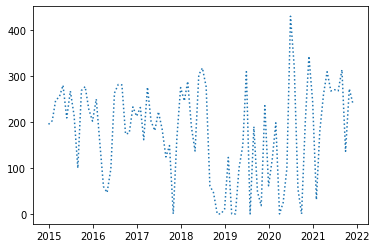

In [134]:
import matplotlib.pyplot as plt
import numpy as np

energyconsumption_final_df_temp = energyconsumption_final_df[energyconsumption_final_df["country_code"]=='ARG']
ypoints = energyconsumption_final_df_temp["coal_peat_and_manufactured_gases"].replace('',0).astype(float)
xpoints = energyconsumption_final_df_temp["date"].astype('datetime64[ns]')
plt.plot(xpoints,ypoints, linestyle = 'dotted')
plt.show()

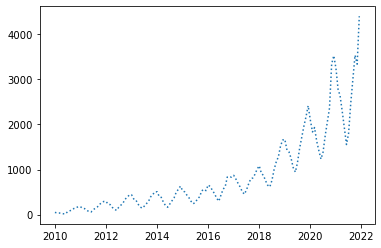

In [135]:
energyconsumption_final_df_temp = energyconsumption_final_df[energyconsumption_final_df["country_code"]=='AUS']
ypoints = energyconsumption_final_df_temp["solar"].replace('',0).astype(float)
xpoints = energyconsumption_final_df_temp["date"].astype('datetime64[ns]')
plt.plot(xpoints,ypoints, linestyle = 'dotted')
plt.show()